In [1]:
from noisy_sine import *

cDim = 1

dataset = NoisySineDataset(dim=cDim, train_size=2**12)
X, y = dataset[:]

print(X.shape)
print(y.shape)

torch.Size([4096, 1])
torch.Size([4096, 1])


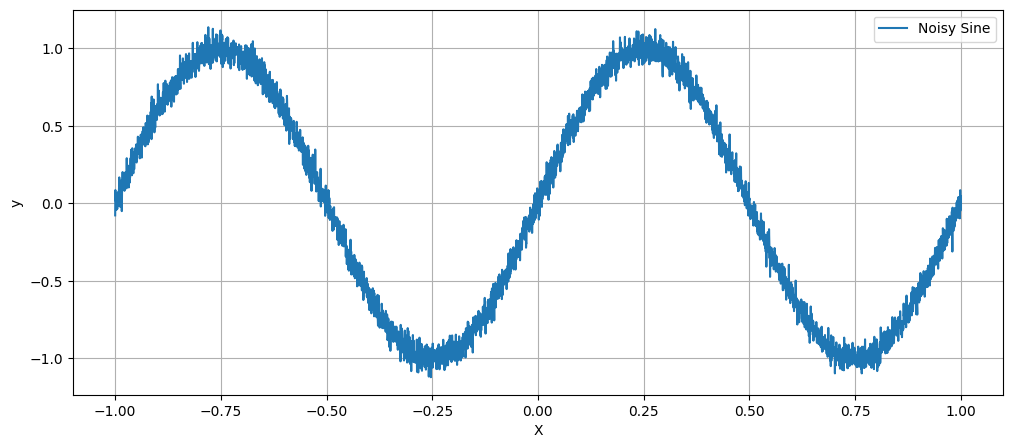

In [3]:
plt.figure(figsize=(12,5))
plt.plot(X, y, label = 'Noisy Sine')

#plt.xticks(range(0, 360, 10))
#plt.xticks(rotation=90)
plt.xlabel('X')
plt.ylabel('y')
#plt.title('Pertubation (PGD) vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

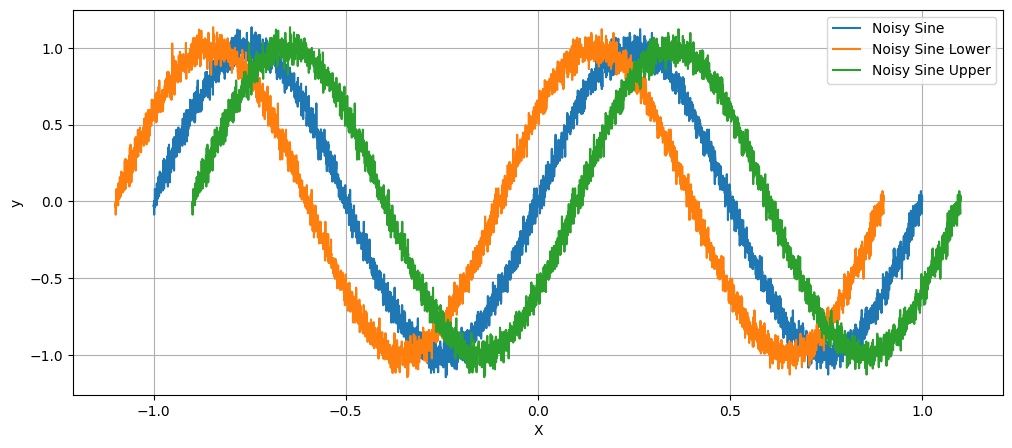

In [6]:
eps = 0.1
objHR = HyperRectangle.from_eps(X, eps)

#print(objHR.lower)

plt.figure(figsize=(12,5))
plt.plot(X, y, label = 'Noisy Sine')
plt.plot(objHR.lower, y, label = 'Noisy Sine Lower')
plt.plot(objHR.upper, y, label = 'Noisy Sine Upper')

#plt.xticks(range(0, 360, 10))
#plt.xticks(rotation=90)
plt.xlabel('X')
plt.ylabel('y')
#plt.title('Pertubation (PGD) vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# MNIST DATASET

In [5]:
from numpy.linalg import norm

import torchvision.datasets as datasets
import torchvision.transforms as V2
import multiprocessing

def GetMNISTDS(strDSPath, cBatch_size):
        train_data = datasets.MNIST(strDSPath, train=True, 
                                    download=False, transform=V2.ToTensor())
        test_data = datasets.MNIST(strDSPath, train=False, 
                                    download=False, transform=V2.ToTensor())
        
        mDLTrain = torch.utils.data.DataLoader(train_data, 
                            batch_size=cBatch_size, 
                            shuffle=True, pin_memory=True, 
                            num_workers=min(multiprocessing.cpu_count(),4))
        mDLTest = torch.utils.data.DataLoader(test_data, 
                            #batch_size=cBatch_size,
                            batch_size=1,
                            shuffle=True, 
                            pin_memory=True, 
                            num_workers=min(multiprocessing.cpu_count(),4))
        mDLTrain.mean = mDLTest.mean = torch.tensor([0.0])
        mDLTrain.std = mDLTest.std = torch.tensor([1.0])

        return mDLTrain, mDLTest

def ShowImg(img, strTitle, strName):
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title(strTitle)
    if strName != None:
        plt.savefig(strName, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def ShowImg(img, strTitle, bTransform, 
            nInCh, nInDim, cDPI = 80, strName=None):
    
    figsize = nInDim / float(cDPI), nInDim / float(cDPI)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')

    if bTransform:
        img = img / 2 + 0.5  # unnormalize
    #npimg = img.numpy()  # convert from tensor
    #cv2.imwrite('./local-results/test.jpg', img.permute(1, 2, 0).numpy()*255)
    if nInCh == 1:
        ax.imshow(img.permute(1, 2, 0), cmap='gray')
    else:
        ax.imshow(img.permute(1, 2, 0))
    
    plt.title(strTitle)
    if strName != None:
        plt.savefig(strName, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [3]:
mDLTrain, mDLTest = GetMNISTDS('../../DATA', 100)

print('Batch Size:', len(mDLTrain))
print('Batch Size:', len(mDLTest))

Batch Size: 600
Batch Size: 10000


Image: torch.Size([1, 1, 28, 28]) Label: torch.Size([1])


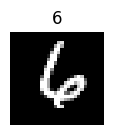

(784,)


1.0

In [30]:
cInCh = 1
cInDim = 28

test_batches = enumerate(mDLTest)

# Load single batch
batch_idx, (listImg, listLabel) = next(test_batches)
print('Image:', listImg.shape, 'Label:', listLabel.shape)
# print(images[0])
strTitle = str(listLabel[0].item())
ShowImg(listImg[0], strTitle, True, cInCh, cInDim, 30)

listImg1D = listImg[0][0].numpy().ravel()
print(listImg1D.shape)
norm(listImg1D, np.inf)


(784,)
1.001
(784,)
0.999


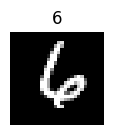

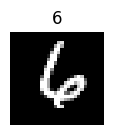

In [35]:
eps = 0.001
objHR = HyperRectangle.from_eps(listImg, eps)

upper1D = objHR.upper[0][0].numpy().ravel()
print(upper1D.shape)
print(norm(upper1D, np.inf))

lower1D = objHR.lower[0][0].numpy().ravel()
print(lower1D.shape)
print(norm(lower1D, np.inf))

ShowImg(objHR.upper[0], strTitle, True, cInCh, cInDim, 30)
ShowImg(objHR.lower[0], strTitle, True, cInCh, cInDim, 30)

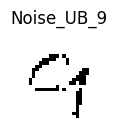

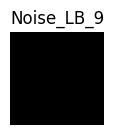

In [22]:
noise_ub = torch.sub(objHR.upper, listImg)
ShowImg(noise_ub[0], 'Noise_UB_'+ strTitle, True, cInCh, cInDim, 30)

noise_lb = torch.sub(listImg, objHR.lower)
ShowImg(noise_lb[0], 'Noise_LB_'+ strTitle, True, cInCh, cInDim, 30)